# Buatlah intrumen kuesioner, dan lakukan uji Validitas dan Reliabilitas, dilanjutkan analisis faktor

### Mengaktifkan library yang digunakan dan Membuka dataframe yang berisi kuesioner

In [1]:
import pandas as pd
data = pd.read_excel('data_answer.xlsx')
data1 = data.drop(columns = (['Nama Lengkap', 'NRP']))
data1

,Timestamp,Program Studi,Kemudahan Aksesbilitas Kampus PENS [Seberapa strategis lokasi PENS?],Kemudahan Aksesbilitas Kampus PENS [Seberapa mudah aksesibilitas transportasi menuju PENS?],Kemudahan Aksesbilitas Kampus PENS [Seberapa memadai fasilitas parkir di PENS?],Kemudahan Aksesbilitas Kampus PENS [Sejauh mana fasilitas penyandang disabilitas?],Kemudahan Aksesbilitas Kampus PENS [Bagaimana kualitas WIFI di area kampus PENS],Fasilitas Sarana dan Prasana Kampus PENS [Laboratorium],Fasilitas Sarana dan Prasana Kampus PENS [Perpustakaan],Fasilitas Sarana dan Prasana Kampus PENS [Masjid],...,Tenaga Pendidik Kampus PENS [Kemampuan dosen dalam menjawab pertanyaan],Tenaga Pendidik Kampus PENS [Ketepatan waktu kuliah],"Tenaga Pendidik Kampus PENS [Penguasaan dosen terhadap materi, wawasan, dan implementasi mata kuliah yang diampu]",Minat dan Bakat Kampus PENS [Organisasi mahasiswa (Ormawa)],Minat dan Bakat Kampus PENS [Unit Kreatifitas Mahasiswa (UKM)],Minat dan Bakat Kampus PENS [Komunitas],Minat dan Bakat Kampus PENS [Prestasi Akademik/non-Akademik],Ketersediaan Sarana Pendukung Pembelajaran [Ketersediaan Bahan ajar (handout/file ppt)],Ketersediaan Sarana Pendukung Pembelajaran [Ketersediaan Buku referensi (textbook) tersedia dengan baik],Ketersediaan Sarana Pendukung Pembelajaran [Ketersediaan sarana prasarana dan kualitasnya yang mendukung mata kuliah]
0,2023-10-24 09:43:04.426,D4 Sains Data Terapan,Baik,Baik,Kurang,Kurang,Kurang,Baik,Kurang,Kurang,...,Baik,Baik,Baik,Baik,Baik,Baik,Baik,Baik,Kurang,Baik
1,2023-10-24 09:43:09.541,D4 Sains Data Terapan,Baik,Baik,Baik,Baik,Sangat Baik,Sangat Baik,Sangat Baik,Sangat Baik,...,Baik,Baik,Baik,Baik,Baik,Baik,Baik,Baik,Baik,Baik
2,2023-10-24 09:43:34.792,D4 Sains Data Terapan,Baik,Baik,Kurang,Baik,Sangat Baik,Sangat Baik,Sangat Baik,Baik,...,Baik,Baik,Baik,Kurang,Kurang,Baik,Baik,Kurang,Kurang,Kurang
3,2023-10-24 09:43:36.658,D4 Sains Data Terapan,Baik,Baik,Baik,Baik,Sangat Baik,Sangat Baik,Sangat Baik,Sangat Baik,...,Baik,Baik,Baik,Baik,Baik,Baik,Baik,Baik,Sangat Baik,Sangat Baik
4,2023-10-24 09:43:45.975,D4 Sains Data Terapan,Sangat Baik,Sangat Baik,Kurang,Kurang,Kurang,Sangat Baik,Sangat Baik,Baik,...,Sangat Baik,Baik,Sangat Baik,Kurang,Baik,Baik,Baik,Sangat Baik,Sangat Baik,Sangat Baik
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,2023-10-25 19:14:01.400,D4 Teknik Informatika,Sangat Baik,Baik,Baik,Baik,Sangat Kurang,Sangat Baik,Sangat Baik,Kurang,...,Baik,Kurang,Baik,Baik,Baik,Baik,Baik,Baik,Baik,Baik
119,2023-10-25 19:18:07.145,D3 Teknik Informatika,Baik,Baik,Kurang,Baik,Baik,Sangat Baik,Sangat Baik,Sangat Baik,...,Sangat Baik,Baik,Sangat Baik,Baik,Baik,Baik,Baik,Baik,Baik,Baik
120,2023-10-25 19:49:06.825,D4 Teknik Informatika,Baik,Baik,Baik,Baik,Sangat Kurang,Baik,Sangat Baik,Kurang,...,Baik,Baik,Baik,Baik,Baik,Baik,Baik,Baik,Baik,Baik
121,2023-10-25 22:00:23.219,D3 Teknik Informatika,Baik,Baik,Kurang,Kurang,Kurang,Baik,Baik,Baik,...,Baik,Baik,Sangat Baik,Baik,Baik,Baik,Sangat Baik,Sangat Baik,Baik,Kurang


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 25 columns):
 #   Column                                                                                                                 Non-Null Count  Dtype         
---  ------                                                                                                                 --------------  -----         
 0   Timestamp                                                                                                              123 non-null    datetime64[ns]
 1   Nama Lengkap                                                                                                           123 non-null    object        
 2   NRP                                                                                                                    123 non-null    int64         
 3   Program Studi                                                                                                      

### PRE PROCESSING

In [3]:
data1 = data.drop(columns = (['Timestamp', 'Program Studi','Nama Lengkap', 'NRP']))
df = pd.DataFrame(data1)

# Menggantikan nilai 'sangat baik' dengan 4 dan 'baik' dengan 3 di seluruh dataframe
df = df.replace({'Sangat Baik': 4, 'Baik': 3, 'Kurang' : 2, 'Sangat Kurang' : 1 })

# Rename kolom dari indeks 0 hingga 21
columns_to_rename = df.columns[0:21] 

# Membuat daftar nama baru sesuai dengan jumlah kolom yang akan diubah
new_column_names = [f'X{i + 1}' for i in range(len(columns_to_rename))]

# Mengganti nama kolom berdasarkan indeks
df.columns.values[0:21] = new_column_names
df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21
0,3,3,2,2,2,3,2,2,2,3,...,3,3,3,3,3,3,3,3,2,3
1,3,3,3,3,4,4,4,4,4,4,...,3,3,3,3,3,3,3,3,3,3
2,3,3,2,3,4,4,4,3,2,2,...,3,3,3,2,2,3,3,2,2,2
3,3,3,3,3,4,4,4,4,4,2,...,3,3,3,3,3,3,3,3,4,4
4,4,4,2,2,2,4,4,3,4,2,...,4,3,4,2,3,3,3,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,4,3,3,3,1,4,4,2,3,3,...,3,2,3,3,3,3,3,3,3,3
119,3,3,2,3,3,4,4,4,4,4,...,4,3,4,3,3,3,3,3,3,3
120,3,3,3,3,1,3,4,2,3,3,...,3,3,3,3,3,3,3,3,3,3
121,3,3,2,2,2,3,3,3,3,3,...,3,3,4,3,3,3,4,4,3,2


In [4]:
df.to_csv("data.studi.csv")

# UJI VALIDITAS, 30 data awal

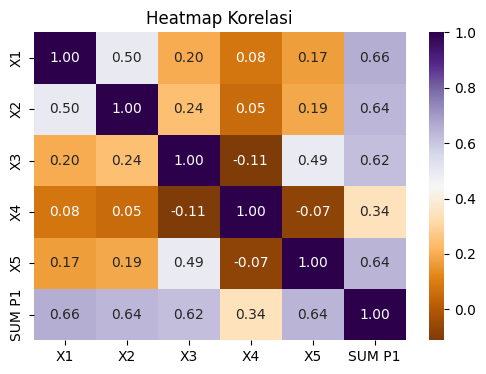

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

dataa = pd.read_excel('data.studi.xlsx')
df1 = dataa.loc[0:29,"X1":"SUM P1"]
corr_matrix = df1.corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='PuOr', fmt=".2f")
plt.title('Heatmap Korelasi')
plt.show()

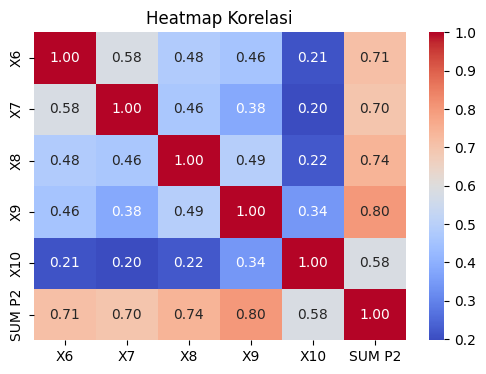

In [6]:
df2 = dataa.loc[0:29,"X6":"SUM P2"]
corr_matrix = df2.corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi')
plt.show()

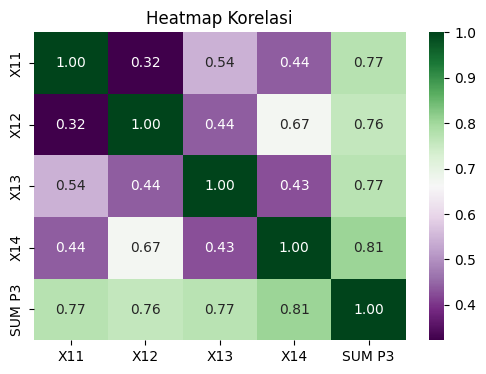

In [7]:
df3 = dataa.loc[0:29,"X11":"SUM P3"]
corr_matrix = df3.corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='PRGn', fmt=".2f")
plt.title('Heatmap Korelasi')
plt.show()

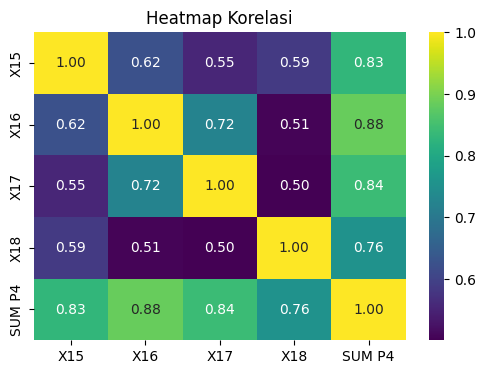

In [8]:
df4 = dataa.loc[0:29,"X15":"SUM P4"]
corr_matrix = df4.corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Heatmap Korelasi')
plt.show()

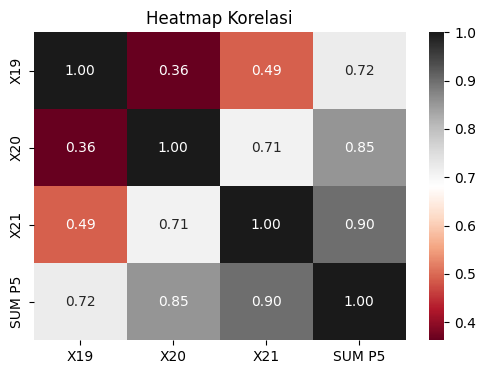

In [9]:
df5 = dataa.loc[0:29,"X19":"SUM P5"]
corr_matrix = df5.corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='RdGy', fmt=".2f")
plt.title('Heatmap Korelasi')
plt.show()

## Karena Mayoritas Indikator nilai R Hitung > R Tabel maka Data ini Valid

# UJI RELIABILITAS

In [10]:
dfr = df.loc[0:29]
dfr['Total_Skor'] = dfr.sum(axis = 1, skipna = True)
dfr.head()

C:\Users\User\AppData\Local\Temp\ipykernel_19732\3471237405.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfr['Total_Skor'] = dfr.sum(axis = 1, skipna = True)


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X13,X14,X15,X16,X17,X18,X19,X20,X21,Total_Skor
0,3,3,2,2,2,3,2,2,2,3,...,3,3,3,3,3,3,3,2,3,56
1,3,3,3,3,4,4,4,4,4,4,...,3,3,3,3,3,3,3,3,3,69
2,3,3,2,3,4,4,4,3,2,2,...,3,3,2,2,3,3,2,2,2,58
3,3,3,3,3,4,4,4,4,4,2,...,3,3,3,3,3,3,3,4,4,69
4,4,4,2,2,2,4,4,3,4,2,...,3,4,2,3,3,3,4,4,4,68


In [11]:
import numpy as np

def cronbach_alpha(df):
    df_corr = df.corr()
    N = df.shape[1]
    rs = np.array([])
    
    for i, col in enumerate(df_corr.columns):
        sum = df_corr[col][i+1:].values 
        rs = np.append(sum, rs)
    mean_r= np.mean(rs)
    
    cronbach_alpha = (N * mean_r) / (1 + (N - 1) * mean_r)
    return cronbach_alpha

In [12]:
cronbach_alpha(df)

0.8597796579903998

## Karena Nilai Cronach's Alpha > 0.70 Maka dapat disimpulkan Data ini Reliabel

# ANALISIS FAKTOR 

## a.) UJI KECUKUPAN

In [13]:
# Import required libraries
import pandas as pd
from sklearn.datasets import load_iris
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

In [14]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value

(856.4217940511593, 6.766763400139179e-79)

In [15]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df)
kmo_model

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


0.7749047209515441

## b.) Analisis faktor 

In [32]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.fit(df)

# Check Eigenvalues
eigen_values, vectors = fa.get_eigenvalues()
eigen_values

array([5.74144857, 2.00698805, 1.71878509, 1.19616659, 1.12375242,
       1.06312233, 1.00192814, 0.95524295, 0.79144365, 0.76597461,
       0.66119661, 0.62060834, 0.56835086, 0.49182265, 0.46120113,
       0.43353821, 0.3901012 , 0.30867309, 0.26730492, 0.25046449,
       0.1818861 ])

## c.) Scree Plot

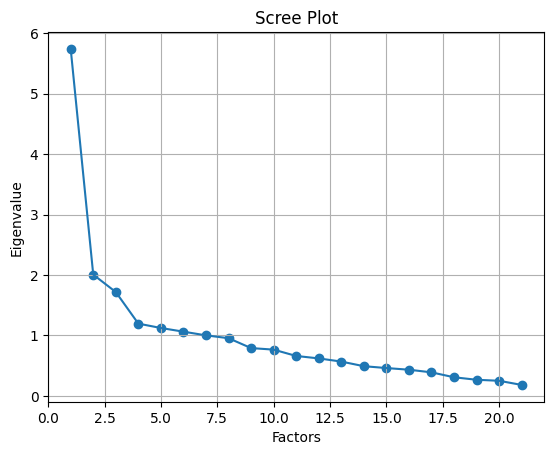

In [17]:
# Create scree plot using matplotlib
plt.scatter(range(1,df.shape[1]+1),eigen_values)
plt.plot(range(1,df.shape[1]+1),eigen_values)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [28]:
fa = FactorAnalyzer(n_factors=6,rotation='varimax')
fa.fit(df)

FactorAnalyzer(n_factors=6, rotation='varimax', rotation_kwargs={})

In [29]:
loadings = fa.loadings_

In [22]:
factor_df=pd.DataFrame(fa.loadings_,index=df.columns)
print(factor_df)

Empty DataFrame
Columns: []
Index: [X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14, X15, X16, X17, X18, X19, X20, X21]


## d.) Ambil faktor yang mempunyai nilai eigen > 1

In [43]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.analyze(df, 6, rotation="varimax")
fa.loadings

AttributeError: 'FactorAnalyzer' object has no attribute 'analyze'

In [46]:
# Create factor analysis object and perform factor analysis using 5 factors
fa = FactorAnalyzer()
fa.analyze(df, 5, rotation="varimax")
fa.loadings

AttributeError: 'FactorAnalyzer' object has no attribute 'analyze'

In [47]:
fa = FactorAnalyzer()
fa.analyze(df, 4, rotation="varimax")
fa.loadings

AttributeError: 'FactorAnalyzer' object has no attribute 'analyze'

In [48]:
fa = FactorAnalyzer()
fa.analyze(df, 3, rotation="varimax")
fa.loadings

AttributeError: 'FactorAnalyzer' object has no attribute 'analyze'

<Axes: >

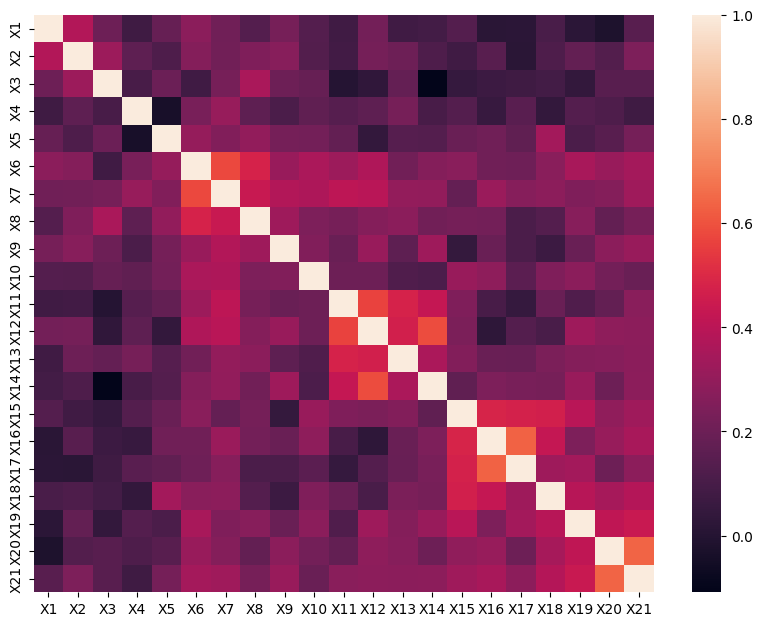

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix=df.corr()
corr_matrix
fig = plt.figure(figsize=(10,7.5))
sns.heatmap(corr_matrix)

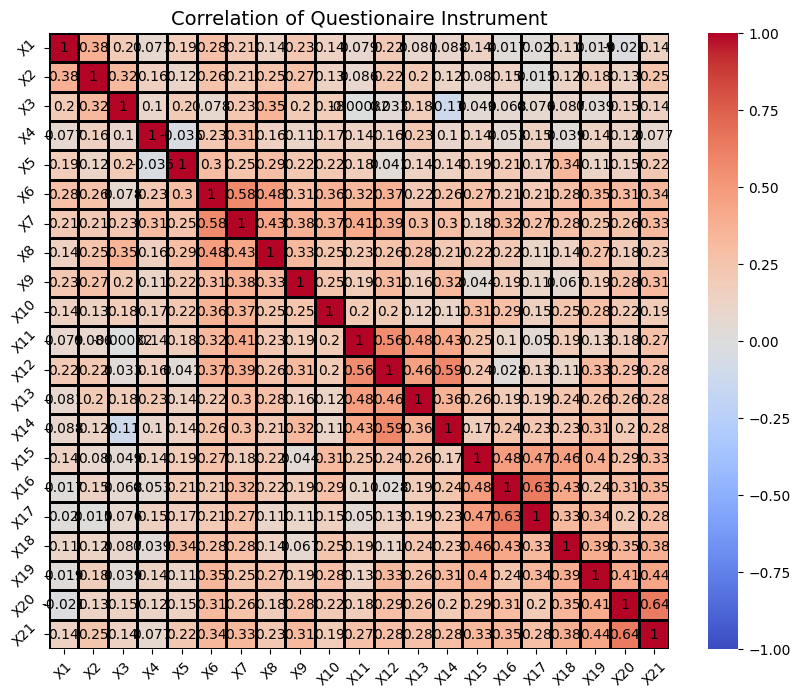

In [45]:
fig = plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, 
            cmap='coolwarm',
            linewidths=0.75,
            linecolor='black',
            cbar=True,
            vmin=-1,
            vmax=1,
            annot=True,
            annot_kws={'size':10,'color':'black'})
plt.tick_params(labelsize=10,rotation=45)
plt.title('Correlation of Questionaire Instrument',size=14)
plt.savefig("corr_quest.png")